In [1]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [2]:
import pandas as pd
import os

## Medication Patient Data

## Filter Meds

### Med 1

In [3]:
# Male, 70-80, WHITE

In [52]:
gender = "M"
age_b = 60
age_a = 70
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [53]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [54]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [55]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [56]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [57]:
med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [58]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
208,820,2077-04-26,M,2144-03-24 00:00:00,1,225158,193603,280074.0,2144-02-24 23:30:00,2144-02-24 23:56:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 22:17:00,67.0
209,820,2077-04-26,M,2144-03-24 00:00:00,1,226452,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 06:22:00,67.0
210,820,2077-04-26,M,2144-03-24 00:00:00,1,225975,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,Heparin Sodium (Prophylaxis),Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,2 days 06:22:00,67.0
211,820,2077-04-26,M,2144-03-24 00:00:00,1,223257,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,Insulin - 70/30,Insulin - 70/30,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 06:22:00,67.0
212,820,2077-04-26,M,2144-03-24 00:00:00,1,223262,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,Insulin - Humalog,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 06:22:00,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322825,44069,2064-04-08,M,NaN,0,223258,138192,214441.0,2131-02-15 22:30:00,2131-02-15 22:31:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 04:20:00,67.0
322826,44069,2064-04-08,M,NaN,0,220864,138192,214441.0,2131-02-15 21:53:00,2131-02-15 23:53:00,...,Albumin 5%,Albumin 5%,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,3 days 05:42:00,67.0
322827,44069,2064-04-08,M,NaN,0,222056,138192,214441.0,2131-02-15 22:32:00,2131-02-16 01:27:00,...,Nitroglycerin,Nitroglycerin,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 07:16:00,67.0
322828,44069,2064-04-08,M,NaN,0,226452,138192,214441.0,2131-02-16 06:00:00,2131-02-16 06:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 11:50:00,67.0


In [59]:
d_m_l_doc = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv")).drop(columns=["Unnamed: 0"])

In [60]:
dict_d_m_l = d_m_l_doc.to_dict("records")
res_dict_mapping_med = {
    v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']
}

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/109719822.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']


In [61]:
med1["MIMICExtractLabel"] = med1.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [62]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
208,820,2077-04-26,M,2144-03-24 00:00:00,1,225158,193603,280074.0,2144-02-24 23:30:00,2144-02-24 23:56:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 22:17:00,67.0,NaCl 0.9%
209,820,2077-04-26,M,2144-03-24 00:00:00,1,226452,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 06:22:00,67.0,PO Intake
210,820,2077-04-26,M,2144-03-24 00:00:00,1,225975,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,2 days 06:22:00,67.0,Heparin Sodium (Prophylaxis)
211,820,2077-04-26,M,2144-03-24 00:00:00,1,223257,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,Insulin - 70/30,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 06:22:00,67.0,Insulin - 70/30
212,820,2077-04-26,M,2144-03-24 00:00:00,1,223262,193603,280074.0,2144-02-25 08:00:00,2144-02-25 08:01:00,...,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 06:22:00,67.0,Insulin - Humalog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322825,44069,2064-04-08,M,NaN,0,223258,138192,214441.0,2131-02-15 22:30:00,2131-02-15 22:31:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 04:20:00,67.0,Insulin - Regular
322826,44069,2064-04-08,M,NaN,0,220864,138192,214441.0,2131-02-15 21:53:00,2131-02-15 23:53:00,...,Albumin 5%,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,3 days 05:42:00,67.0,Albumin 5%
322827,44069,2064-04-08,M,NaN,0,222056,138192,214441.0,2131-02-15 22:32:00,2131-02-16 01:27:00,...,Nitroglycerin,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 07:16:00,67.0,Nitroglycerin
322828,44069,2064-04-08,M,NaN,0,226452,138192,214441.0,2131-02-16 06:00:00,2131-02-16 06:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 11:50:00,67.0,PO Intake


### Med 2

In [63]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [64]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [65]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [66]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [67]:
med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [68]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
155,820,2077-04-26,M,2144-03-24 00:00:00,1,225158,193603,280074.0,2144-02-24 23:56:00,2144-02-24 23:57:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 22:18:00,67.0
156,820,2077-04-26,M,2144-03-24 00:00:00,1,226452,193603,280074.0,2144-02-25 09:00:00,2144-02-25 09:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 07:22:00,67.0
157,820,2077-04-26,M,2144-03-24 00:00:00,1,223262,193603,280074.0,2144-02-25 12:00:00,2144-02-25 12:01:00,...,Insulin - Humalog,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 10:22:00,67.0
158,820,2077-04-26,M,2144-03-24 00:00:00,1,225975,193603,280074.0,2144-02-25 14:00:00,2144-02-25 14:01:00,...,Heparin Sodium (Prophylaxis),Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,2 days 12:22:00,67.0
159,820,2077-04-26,M,2144-03-24 00:00:00,1,223257,193603,280074.0,2144-02-26 08:00:00,2144-02-26 08:01:00,...,Insulin - 70/30,Insulin - 70/30,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 06:22:00,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237480,44069,2064-04-08,M,NaN,0,220864,138192,214441.0,2131-02-16 02:05:00,2131-02-16 04:05:00,...,Albumin 5%,Albumin 5%,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,3 days 09:54:00,67.0
237481,44069,2064-04-08,M,NaN,0,225798,138192,214441.0,2131-02-16 08:00:00,2131-02-16 08:01:00,...,Vancomycin,Vancomycin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 13:50:00,67.0
237482,44069,2064-04-08,M,NaN,0,226452,138192,214441.0,2131-02-16 08:30:00,2131-02-16 08:31:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:20:00,67.0
237483,44069,2064-04-08,M,NaN,0,221456,138192,214441.0,2131-02-16 10:00:00,2131-02-16 11:00:00,...,Calcium Gluconate,Calcium Gluconate,metavision,inputevents_mv,Medications,grams,Solution,NaN,3 days 16:49:00,67.0


In [69]:
med2["MIMICExtractLabel"] = med2.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [70]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
155,820,2077-04-26,M,2144-03-24 00:00:00,1,225158,193603,280074.0,2144-02-24 23:56:00,2144-02-24 23:57:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 22:18:00,67.0,NaCl 0.9%
156,820,2077-04-26,M,2144-03-24 00:00:00,1,226452,193603,280074.0,2144-02-25 09:00:00,2144-02-25 09:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 07:22:00,67.0,PO Intake
157,820,2077-04-26,M,2144-03-24 00:00:00,1,223262,193603,280074.0,2144-02-25 12:00:00,2144-02-25 12:01:00,...,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 10:22:00,67.0,Insulin - Humalog
158,820,2077-04-26,M,2144-03-24 00:00:00,1,225975,193603,280074.0,2144-02-25 14:00:00,2144-02-25 14:01:00,...,Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,2 days 12:22:00,67.0,Heparin Sodium (Prophylaxis)
159,820,2077-04-26,M,2144-03-24 00:00:00,1,223257,193603,280074.0,2144-02-26 08:00:00,2144-02-26 08:01:00,...,Insulin - 70/30,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 06:22:00,67.0,Insulin - 70/30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237480,44069,2064-04-08,M,NaN,0,220864,138192,214441.0,2131-02-16 02:05:00,2131-02-16 04:05:00,...,Albumin 5%,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,3 days 09:54:00,67.0,Albumin 5%
237481,44069,2064-04-08,M,NaN,0,225798,138192,214441.0,2131-02-16 08:00:00,2131-02-16 08:01:00,...,Vancomycin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 13:50:00,67.0,Vancomycin
237482,44069,2064-04-08,M,NaN,0,226452,138192,214441.0,2131-02-16 08:30:00,2131-02-16 08:31:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:20:00,67.0,PO Intake
237483,44069,2064-04-08,M,NaN,0,221456,138192,214441.0,2131-02-16 10:00:00,2131-02-16 11:00:00,...,Calcium Gluconate,metavision,inputevents_mv,Medications,grams,Solution,NaN,3 days 16:49:00,67.0,Calcium Gluconate


## Filter Labs

In [71]:
# labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/217279848.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract.csv"))


Text(0.5, 1.0, 'Distribution of age')

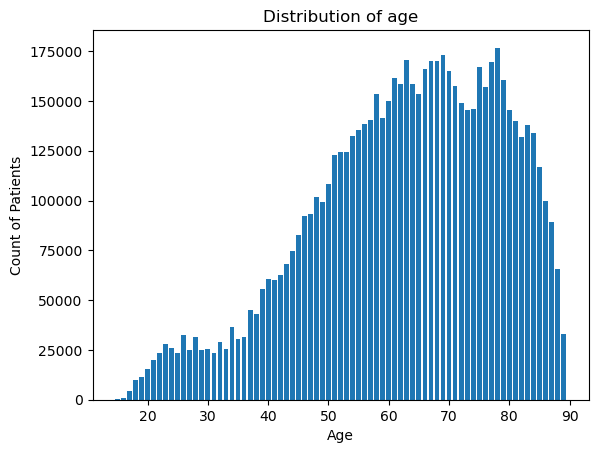

In [72]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [73]:
labs = labs.drop(columns=["Unnamed: 0"])
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
0,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,0.5,"Bilirubin, Total",CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50885,ENGL,DIVORCED,PROTESTANT QUAKER,58526,0.5,mg/dL
1,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,2.7,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50912,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.7,mg/dL
2,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,4.9,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50971,ENGL,DIVORCED,PROTESTANT QUAKER,58526,4.9,mEq/L
3,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,10.0,Alanine aminotransferase,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50861,ENGL,DIVORCED,PROTESTANT QUAKER,58526,10.0,IU/L
4,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,16.0,Asparate aminotransferase,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50878,ENGL,DIVORCED,PROTESTANT QUAKER,58526,16.0,IU/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062478,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,4.4,Potassium serum,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227442,ENGL,MARRIED,JEWISH,40370,4.4,mEq/L
7062479,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,8.4,Calcium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,225625,ENGL,MARRIED,JEWISH,40370,8.4,mg/dL
7062480,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
7062481,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L


In [74]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [75]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [76]:
labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [77]:
labs.shape

(324840, 31)

Text(0.5, 1.0, 'Distribution of age')

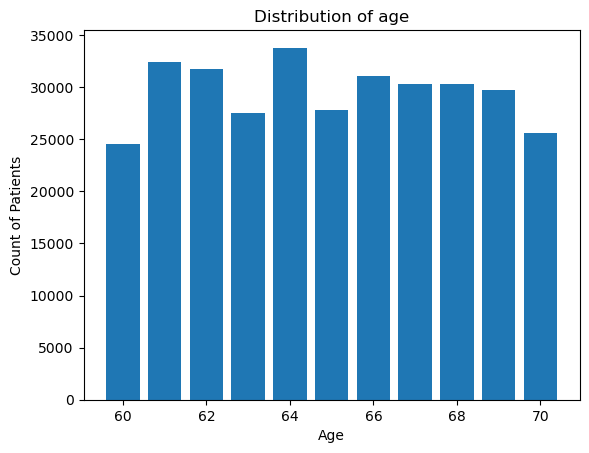

In [78]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [79]:
import pickle
final_mapping_lab_itemids = pickle.load(open("/Users/yanpavan/Desktop/d.pkl", "rb"))

In [80]:
final_itemids_list = list(final_mapping_lab_itemids.keys())

## Pairs

In [81]:
counts = med1.groupby(["MIMICExtractLabel"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,HADM_ID
MIMICExtractLabel,
NaCl 0.9%,1744
Dextrose 5%,1580
PO Intake,1507
Solution,1304
Insulin - Regular,1036
...,...
Nutren Renal (1/2),1
Isosource 1.5 (3/4),1
Replete (1/2),1


In [82]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [83]:
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
198,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,1.3,Creatinine,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,50912,ENGL,SINGLE,NOT SPECIFIED,54610,1.3,mg/dL
199,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,3.3,"Bilirubin, Total",EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,50885,ENGL,SINGLE,NOT SPECIFIED,54610,3.3,mg/dL
200,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,5.7,Potassium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,50971,ENGL,SINGLE,NOT SPECIFIED,54610,5.7,mEq/L
201,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,85.0,Lipase,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,50956,ENGL,SINGLE,NOT SPECIFIED,54610,85.0,IU/L
202,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,92.0,Glucose,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,50931,ENGL,SINGLE,NOT SPECIFIED,54610,92.0,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056604,199928.0,2152-03-06 07:15:00,2152-03-08 03:18:00,134.0,Glucose,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,1,0,Private,50931,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,134.0,mg/dL
7056605,199928.0,2152-03-06 07:15:00,2152-03-08 03:18:00,136.0,Sodium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,1,0,Private,50983,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,136.0,mEq/L
7056606,199928.0,2152-03-06 07:15:00,2152-03-09 08:15:00,2.2,Magnesium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,1,0,Private,50960,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,2.2,mg/dL
7056607,199928.0,2152-03-06 07:15:00,2152-03-09 08:15:00,4.6,Potassium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,1,0,Private,50971,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,4.6,mEq/L


In [84]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [85]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [86]:
labs["MIMICExtractName"] = labs["MIMICExtractName"].apply(lambda r: r.strip())
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM,LabTimeFromAdmit,hours_in
198,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,1.3,Creatinine,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,50912,ENGL,SINGLE,NOT SPECIFIED,54610,1.3,mg/dL,-1 days +20:56:00,-3.066667
199,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,3.3,"Bilirubin, Total",EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,50885,ENGL,SINGLE,NOT SPECIFIED,54610,3.3,mg/dL,-1 days +20:56:00,-3.066667
200,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,5.7,Potassium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,50971,ENGL,SINGLE,NOT SPECIFIED,54610,5.7,mEq/L,-1 days +20:56:00,-3.066667
201,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,85.0,Lipase,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,50956,ENGL,SINGLE,NOT SPECIFIED,54610,85.0,IU/L,-1 days +20:56:00,-3.066667
202,100003.0,2150-04-17 15:34:00,2150-04-17 12:30:00,92.0,Glucose,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,50931,ENGL,SINGLE,NOT SPECIFIED,54610,92.0,mg/dL,-1 days +20:56:00,-3.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056604,199928.0,2152-03-06 07:15:00,2152-03-08 03:18:00,134.0,Glucose,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,Private,50931,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,134.0,mg/dL,1 days 20:03:00,44.050000
7056605,199928.0,2152-03-06 07:15:00,2152-03-08 03:18:00,136.0,Sodium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,Private,50983,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,136.0,mEq/L,1 days 20:03:00,44.050000
7056606,199928.0,2152-03-06 07:15:00,2152-03-09 08:15:00,2.2,Magnesium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,Private,50960,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,2.2,mg/dL,3 days 01:00:00,73.000000
7056607,199928.0,2152-03-06 07:15:00,2152-03-09 08:15:00,4.6,Potassium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,66.0,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,Private,50971,ENGL,MARRIED,CHRISTIAN SCIENTIST,89806,4.6,mEq/L,3 days 01:00:00,73.000000


In [87]:
lab_unique_names = labs[labs.HADM_ID.isin(med1.HADM_ID.unique())]["MIMICExtractName"].unique()
lab_unique_names

array(['Creatinine', 'Bilirubin, Total', 'Potassium', 'Lipase', 'Glucose',
       'Alanine aminotransferase', 'Sodium', 'Asparate aminotransferase',
       'Prothrombin time INR', 'Magnesium', 'Calcium', 'Calcium ionized',
       'Potassium serum', 'Lactic acid', 'Bilirubin, Indirect',
       'Bilirubin, Direct', 'Hemoglobin percent', 'Glucose urine',
       'Amylase', 'Calcium urine', 'Creatinine urine', 'Glucose, CSF',
       'Uric Acid', 'Glucose, Pleural', 'Sodium, Urine',
       'Potassium, Urine', 'Platelets', 'Vitamin B12',
       'Amylase, Body Fluid', 'Glucose, Body Fluid', 'Magnesium, Urine',
       'Uric Acid, Urine', 'Bilirubin, Total, Body Fluid',
       'Glucose, Ascites', 'Amylase, Ascites',
       'Bilirubin, Total, Ascites', 'Creatinine ascites',
       'Creatinine pleural', 'Amylase, Pleural', 'Prolactin',
       'Bilirubin, Total, Pleural', 'Creatinine body fluid',
       'Potassium, Body Fluid', 'Sodium, Body Fluid',
       'Potassium, Ascites', 'Sodium, Ascites', '

In [88]:
mimic_extract_map = pd.read_csv(os.path.join("/Users/yanpavan/Desktop/", "itemid_to_variable_map.csv"))
mimic_extract_map_small = mimic_extract_map[["LEVEL2", "MIMIC LABEL", "ITEMID"]]
lab_names = [k.lower() for k in d_m_l_doc.groupby("lab result").count()[["Medication"]].reset_index()["lab result"].to_list()]
res_dict = {}
for l in lab_names:
    res_dict[l.lower().strip()] = mimic_extract_map_small[mimic_extract_map_small.apply(lambda r: l.lower() in str(r["MIMIC LABEL"]).lower(), axis=1)].dropna()
lab_itemids, lab_labels = {}, {}
for l in res_dict:
    if res_dict[l].shape[0]>0:
        lab_labels[l] = res_dict[l].groupby("LEVEL2")["MIMIC LABEL"].apply(list).to_dict()
        lab_itemids[l] = res_dict[l].groupby("LEVEL2")["ITEMID"].apply(list).to_dict()   
del lab_itemids['ast']['Diastolic blood pressure']     
import pickle
v_r_lab_dict = pickle.load(open(os.path.join(data, "mapping_lab_itemids.pkl"), "rb"))
temp_itemids_list = {k: [i for l in list(v.values()) for i in l] for k, v in lab_itemids.items()}
for l in v_r_lab_dict:
    if l.lower().strip() in temp_itemids_list:
        items = [k[1] for k in v_r_lab_dict[l]]
        names = [k[0] for k in v_r_lab_dict[l]]
        diff = list(set(items).difference(set(temp_itemids_list[l.lower().strip()])))
        if len(diff)>0:
            for k in diff:
               lab_itemids[l.lower().strip()][names[items.index(k)]] = [k]
    else:
        for l1 in v_r_lab_dict[l]:
            if l1[0] not in lab_itemids:
                lab_itemids[l1[0]] = {}
                lab_itemids[l1[0]][l1[0]] = [l1[1]]


In [89]:
orig = ['alt',
 'ana',
 'ast',
 'hemoglobin',
 'inr',
 'bilirubin',
 'calcium',
 'creatinine',
 'glucose',
 'lactic acid',
 'magnesium',
 'platelets',
 'potassium',
 'sodium']
dict_lab_mapping = {
    k:[k] for k in orig
}


rest = ['Uric Acid',
 'Uric Acid, Urine',
 'Vitamin B12',
 'Prolactin',
 'Amylase',
 'Amylase, Ascites',
 'Amylase, Body Fluid',
 'Amylase, Joint Fluid',
 'Amylase, Pleural',
 'Amylase, Urine',
 'Lipase',
 'Lipase, Ascites',
 'Lipase, Body Fluid']
dict_lab_mapping["Uric acid".lower()] = ['Uric Acid', 'Uric Acid, Urine']
dict_lab_mapping["B12".lower()] = ['Vitamin B12']
dict_lab_mapping["prolactin".lower()] = ['Prolactin']
dict_lab_mapping["Amylase".lower()] = [
 'Amylase',
 'Amylase, Ascites',
 'Amylase, Body Fluid',
 'Amylase, Joint Fluid',
 'Amylase, Pleural',
 'Amylase, Urine']
 
dict_lab_mapping["Lipase".lower()] = ['Lipase',
 'Lipase, Ascites',
 'Lipase, Body Fluid']


In [90]:
d_lab_map = {k.strip():[] for k in d_m_l_doc["lab result"].unique()}
for i, v in lab_itemids.items():
    if i.lower() in d_lab_map:
        d_lab_map[i.lower()].extend(list(v.keys()))
    elif i.strip() in d_lab_map:
        d_lab_map[i].extend(list(v.keys()))

d_lab_map["ALT"].extend(["Alanine aminotransferase"])
d_lab_map["ANA"].extend(["Fraction inspired oxygen"])
d_lab_map["AST"].extend(["Asparate aminotransferase"])
d_lab_map["Hemoglobin"].extend(["Hemoglobin percent", "Hemoglobin C", "Hemoglobin F", "Hemoglobin A2"])
d_lab_map["Uric acid"].extend(["Uric Acid, Urine", "Uric Acid"])
d_lab_map["Amylase"].extend(["Amylase, Ascites", "Amylase, Body Fluid", "Amylase, Joint Fluid", "Amylase, Pleural", "Amylase, Urine"])
d_lab_map["Lipase"].extend(["Lipase, Ascites", "Lipase, Body Fluid"])
d_lab_map["B12"].extend(["Vitamin B12"])
d_lab_map["INR"].extend(["Prothrombin time INR"])

In [91]:
d_lab_map

{'potassium': ['Potassium',
  'Potassium serum',
  'Potassium, Body Fluid',
  'Potassium, Pleural',
  'Potassium, Stool',
  'Potassium, Urine',
  'Potassium, Ascites'],
 'magnesium': ['Magnesium', 'Magnesium, Urine'],
 'calcium': ['Calcium', 'Calcium Ionized', 'Calcium ionized', 'Calcium urine'],
 'Uric acid': ['Uric Acid, Urine', 'Uric Acid'],
 'B12': ['Vitamin B12'],
 'lactic acid': ['Lactic acid'],
 'ALT': ['Alanine aminotransferase'],
 'AST': ['Asparate aminotransferase'],
 'Hemoglobin': ['Hemoglobin percent',
  'Hemoglobin C',
  'Hemoglobin F',
  'Hemoglobin A2'],
 'platelets': ['Platelets', 'Large Platelets'],
 'creatinine': ['Creatinine',
  'Creatinine ascites',
  'Creatinine body fluid',
  'Creatinine pleural',
  'Creatinine urine'],
 'INR': ['Prothrombin time INR'],
 'Aptt': [],
 'sodium': ['Sodium',
  'Sodium, Ascites',
  'Sodium, Body Fluid',
  'Sodium, Pleural',
  'Sodium, Stool',
  'Sodium, Urine'],
 'prolactin': ['Prolactin'],
 'CPK': [],
 'bilirubin': ['Bilirubin',
  'Bi

In [92]:
indexes = list(d_m_l_doc.groupby(["Medication", "lab result"]).count().index)

In [118]:
med_vals = [k[0].strip() for k in indexes]
labtest_vals = [k[1].strip() for k in indexes]

In [119]:
med1.MIMICExtractLabel.value_counts()

NaCl 0.9%             1744
Dextrose 5%           1580
PO Intake             1507
Solution              1304
Insulin - Regular     1036
                      ... 
Abciximab (Reopro)       1
Impact (3/4)             1
Nutren 2.0 (3/4)         1
PACU PO Intake           1
Peptamen 1.5 (1/2)       1
Name: MIMICExtractLabel, Length: 227, dtype: int64

In [120]:
meds = []
labtests = []

meds.append('Insulin - Regular')
labtests.append('glucose')

# meds.append('Packed Red Blood Cells')
# labtests.append('Hematocrait')

meds.append('Packed Red Blood Cells')
labtests.append('Hemoglobin')

# meds.append('Packed Red Blood Cells')
# labtests.append('Red Blood Cells')

meds.append('Calcium')
labtests.append('calcium')

# meds.append('Albumin 5%')
# labtests.append('Hematocrit')

med_vals.extend(meds)
labtest_vals.extend(labtests)

In [121]:
l_med_lab = [(i[0], k) for i in zip(med_vals, labtest_vals) for k in d_lab_map[i[1]]]
labtest_vals_new = [k[1] for k in l_med_lab]

In [122]:
med_vals_new = [k[0] for k in l_med_lab]

In [123]:
[i for i in zip(med_vals, labtest_vals_new)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Amoxicilin-clavulanate', 'Hemoglobin F'),
 ('Amoxicilin-clavulanate', 'Hemoglobin A2'),
 ('Ceftriaxone', 'Platelets'),
 ('Citalopram', 'Large Platelets'),
 ('Clozapine', 'Alanine aminotransferase'),
 ('Dabigatran', 'Asparate aminotransferase'),
 ('Esmoprazole', 'Bilirubin'),
 ('Fluoxetine', 'Bilirubin, Direct'),
 ('Furosemide', 'Bilirubin, Indirect'),
 ('Glibenclamide', 'Bilirubin, Total'),
 ('Glimepiride', 'Bilirubin, Total, Pleural'),
 ('Haloperidol', 'Bilirubin, Total, Body Fluid'),
 ('Hydrochlorothiazide', 'Bilirubin, Total, Ascites'),
 ('Hydrochlorothiazide', 'Sodium'),
 ('Metformin', 'Sodium, Ascites'),
 ('Metformin', 'Sodium, Body Fluid'),
 ('Omeprazole', 'Sodium, Pleural'),
 ('Pantoprazole', 'Sodium, Stool'),
 ('Paracetamole (acetaminophen)', 'Sodium, Urine'),
 ('Paroxetine', 'Platelets'),
 ('Procainamide', 'Large Platelets'),
 ('Quetiapine', 'Vitamin B12'),
 ('Ram

In [124]:
t_med1 = med1[med1["MIMICExtractLabel"].isin(med_vals_new)]
t_med2 = med2[med2["MIMICExtractLabel"].isin(med_vals_new)]

In [125]:
t_labs = labs[labs["MIMICExtractName"].isin(labtest_vals_new)]

In [126]:
t_labs.shape, labs.shape

((324840, 33), (324840, 33))

In [127]:
# Old - ((997, 65), (693, 64), (1319434, 39))
t_med1.shape, t_med2.shape, t_labs.shape

((3298, 65), (2746, 64), (324840, 33))

In [128]:
t_med1 = t_med1.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_med2 = t_med2.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_labs = t_labs.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractName":"ITEMID"})

In [129]:
for i in set(med_vals):
    bool_val = i in med1.MIMICExtractLabel.value_counts().to_dict()
    print(f"{i} - {bool_val}")

Clozapine - False
Procainamide - True
Valproic acid - False
Citalopram - False
Insulin - Regular - True
Furosemide - True
Ceftriaxone - True
Trimetoprim-sulphamethoxazole - False
Valsartan - False
Glibenclamide - False
Hydrochlorothiazide - False
Amoxicilin-clavulanate - False
Calcium - False
Paroxetine - False
Omeprazole - True
Simvastatin - False
Metformin - False
Warfarin - True
Esmoprazole - False
Rivaroxaban - False
Pantoprazole - True
Fluoxetine - False
Glimepiride - False
Ramipril - False
Packed Red Blood Cells - True
Dabigatran - False
Haloperidol - True
Paracetamole (acetaminophen) - False
Acetylsalycilic acid (aspirin) - False
Quetiapine - False
Spironolactone - False


In [130]:
t_med1.ITEMID.value_counts()

Insulin - Regular         1036
Furosemide                 748
Pantoprazole               580
Packed Red Blood Cells     535
Ceftriaxone                155
Haloperidol                116
Omeprazole                  67
Warfarin                    59
Procainamide                 2
Name: ITEMID, dtype: int64

## Before After Trend Calculation

In [131]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [132]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [133]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [134]:
window = (1,25,4)

In [135]:
def get_vals(r):

    row = r.copy()
    for i in range(window[0], window[1], window[2]):

        if i==1:
            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

            b_window_start = row["MedTimeFromAdmit"].total_seconds()
            b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
            lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"before_abs_0_0"] = {}
                row[f"before_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            med2_bool = check_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
            a_window_start = row["MedTimeFromAdmit"].total_seconds()
            a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
            lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            if med2_bool:
                med2_val = get_med2(row)
                lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"after_abs_0_0"] = {}
                row[f"after_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"after_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"after_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
    
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (i*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{i}_{window[2]}"] = {}
            row[f"before_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (i*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{i}_{window[2]}"] = {}
            row[f"after_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
        
    return row

In [136]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_a = [f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_b.extend([f"before_{t}_0_0" for t in all_types])
cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [137]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [138]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,after_abs_13_4,after_time_13_4,before_abs_17_4,before_time_17_4,after_abs_17_4,after_time_17_4,before_abs_21_4,before_time_21_4,after_abs_21_4,after_time_21_4
253,854,2079-06-12,M,NaN,0,225910,175684,245192.0,2146-10-03 08:38:00,2146-10-03 10:48:00,...,"{'Alanine aminotransferase': 17.0, 'Asparate a...","{'Alanine aminotransferase': 16.35, 'Asparate ...",{},{},"{'Alanine aminotransferase': 17.0, 'Asparate a...","{'Alanine aminotransferase': 17.35, 'Asparate ...",{},{},{},{}
255,854,2079-06-12,M,NaN,0,225168,175684,245192.0,2146-10-03 09:54:00,2146-10-03 10:54:00,...,{},{},{},{},{},{},{},{},{},{}
586,357,2135-03-22,M,2201-08-02 00:00:00,1,225855,101651,259107.0,2199-10-20 13:00:00,2199-10-20 13:01:00,...,"{'Calcium': 8.6, 'Creatinine': 1.0, 'Glucose':...","{'Calcium': 16.016666666666666, 'Creatinine': ...",{},{},{},{},{},{},{},{}
776,533,2101-07-30,M,NaN,0,223258,100009,253656.0,2162-05-17 18:59:00,2162-05-17 23:02:00,...,{},{},{},{},{},{},{},{},{},{}
782,533,2101-07-30,M,NaN,0,221794,100009,253656.0,2162-05-18 08:18:00,2162-05-18 08:19:00,...,"{'Glucose': 169.0, 'Potassium serum': 4.4, 'So...","{'Glucose': 13.683333333333334, 'Potassium ser...","{'Calcium ionized': 1.26, 'Glucose': 125.0, 'L...","{'Calcium ionized': 18.983333333333334, 'Gluco...",{'Glucose': 94.0},{'Glucose': 17.683333333333337},{},{},{'Glucose': 142.0},{'Glucose': 21.683333333333334}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322437,43991,2069-01-27,M,NaN,0,223258,143033,294398.0,2129-10-24 15:49:00,2129-10-24 15:50:00,...,{},{},{},{},{},{},{},{},{},{}
322444,43991,2069-01-27,M,NaN,0,225910,143033,294398.0,2129-10-25 20:39:00,2129-10-25 20:40:00,...,{},{},"{'Calcium ionized': 1.18, 'Creatinine': 1.2, '...","{'Calcium ionized': 17.200000000000003, 'Creat...",{},{},{'Glucose': 124.0},{'Glucose': 21.65},{},{}
322725,44061,2073-09-29,M,NaN,0,225168,107667,243555.0,2136-07-19 00:30:00,2136-07-19 01:30:00,...,{},{},{},{},{},{},{},{},{},{}
322730,44061,2073-09-29,M,NaN,0,225910,107667,243555.0,2136-07-19 03:23:00,2136-07-19 03:24:00,...,{'Prothrombin time INR': 1.4},{'Prothrombin time INR': 15.116666666666667},{},{},{},{},{},{},"{'Alanine aminotransferase': 110.0, 'Asparate ...",{'Alanine aminotransferase': 23.21666666666666...


In [139]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval.csv"))

In [140]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [141]:
[c[["LAB_ITEMID"]] for c in col_vals]

[                      LAB_ITEMID
 2       Alanine aminotransferase
 3      Asparate aminotransferase
 4               Bilirubin, Total
 5                        Calcium
 6                     Creatinine
 ...                          ...
 15356       Prothrombin time INR
 15357                     Sodium
 15358            Calcium ionized
 15359                    Glucose
 15360                  Potassium
 
 [14624 rows x 1 columns],
                       LAB_ITEMID
 2       Alanine aminotransferase
 3      Asparate aminotransferase
 4               Bilirubin, Total
 5                        Calcium
 6                     Creatinine
 ...                          ...
 15356       Prothrombin time INR
 15357                     Sodium
 15358            Calcium ionized
 15359                    Glucose
 15360                  Potassium
 
 [14624 rows x 1 columns],
                  LAB_ITEMID
 0           Calcium ionized
 1                Creatinine
 2                   Glucose
 3        

In [142]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [143]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [144]:
# t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final["LAB_NAME"] = final["LAB_ITEMID"]
final = final.rename(columns={"ITEMID":"MED_NAME"})

In [145]:
final["MED_NAME"]

0                   Ceftriaxone
1                   Ceftriaxone
2                   Ceftriaxone
3                   Ceftriaxone
4                   Ceftriaxone
                  ...          
35678    Packed Red Blood Cells
35679    Packed Red Blood Cells
35680              Pantoprazole
35681                Furosemide
35682         Insulin - Regular
Name: MED_NAME, Length: 35683, dtype: object

In [146]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [147]:
final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [148]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [149]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [150]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_time_1_4_sp', (30866, 96)),
 ('before_abs_1_4_sp', (30866, 96)),
 ('before_time_5_4_sp', (34408, 96)),
 ('before_abs_5_4_sp', (34408, 96)),
 ('before_time_9_4_sp', (25590, 96)),
 ('before_abs_9_4_sp', (25590, 96)),
 ('before_time_13_4_sp', (22878, 96)),
 ('before_abs_13_4_sp', (22878, 96)),
 ('before_time_17_4_sp', (21032, 96)),
 ('before_abs_17_4_sp', (21032, 96)),
 ('before_time_21_4_sp', (16240, 96)),
 ('before_abs_21_4_sp', (16240, 96)),
 ('before_time_0_0_sp', (12872, 96)),
 ('before_abs_0_0_sp', (12872, 96))]

In [151]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{i}_{window[2]}_sp", f"before_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2]) ]
cols_a_sp = [(f"after_{a_t[0]}_{i}_{window[2]}_sp", f"after_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2])]
cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [152]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [153]:
plot_data.keys()

dict_keys(['before_abs_1_4_sp', 'before_abs_5_4_sp', 'before_abs_9_4_sp', 'before_abs_13_4_sp', 'before_abs_17_4_sp', 'before_abs_21_4_sp', 'before_abs_0_0_sp'])

In [154]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [155]:
cols_sp

[('before_abs_1_4_sp', 'before_time_1_4_sp'),
 ('before_abs_5_4_sp', 'before_time_5_4_sp'),
 ('before_abs_9_4_sp', 'before_time_9_4_sp'),
 ('before_abs_13_4_sp', 'before_time_13_4_sp'),
 ('before_abs_17_4_sp', 'before_time_17_4_sp'),
 ('before_abs_21_4_sp', 'before_time_21_4_sp'),
 ('before_abs_0_0_sp', 'before_time_0_0_sp'),
 ('after_abs_1_4_sp', 'after_time_1_4_sp'),
 ('after_abs_5_4_sp', 'after_time_5_4_sp'),
 ('after_abs_9_4_sp', 'after_time_9_4_sp'),
 ('after_abs_13_4_sp', 'after_time_13_4_sp'),
 ('after_abs_17_4_sp', 'after_time_17_4_sp'),
 ('after_abs_21_4_sp', 'after_time_21_4_sp'),
 ('after_abs_0_0_sp', 'after_time_0_0_sp')]

In [156]:
final.columns

Index(['Unnamed: 0', 'SUBJECT_ID', 'DOB', 'GENDER', 'DOD', 'EXPIRE_FLAG',
       'OldITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID',
       'LINKORDERID', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME',
       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION',
       'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE',
       'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y', 'SUBJECT_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'OldLabel', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY'

In [157]:
cols_d = dict(cols_sp)

In [158]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_1_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_0_0_sp
Before Window:  before_abs_5_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_9_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

Before Window:  before_abs_13_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_0_0_sp
Before Window:  before_abs_17_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_21_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_0_0_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_7

In [159]:
p_data.keys()

dict_keys([('Ceftriaxone', 'Creatinine'), ('Ceftriaxone', 'Glucose'), ('Ceftriaxone', 'Potassium'), ('Ceftriaxone', 'Sodium'), ('Furosemide', 'Glucose'), ('Packed Red Blood Cells', 'Glucose'), ('Packed Red Blood Cells', 'Lactic acid'), ('Packed Red Blood Cells', 'Prothrombin time INR'), ('Insulin - Regular', 'Calcium'), ('Insulin - Regular', 'Calcium ionized'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Magnesium'), ('Insulin - Regular', 'Potassium'), ('Insulin - Regular', 'Prothrombin time INR'), ('Insulin - Regular', 'Sodium'), ('Pantoprazole', 'Calcium'), ('Pantoprazole', 'Calcium ionized'), ('Pantoprazole', 'Creatinine'), ('Pantoprazole', 'Glucose'), ('Pantoprazole', 'Lactic acid'), ('Pantoprazole', 'Potassium serum'), ('Pantoprazole', 'Prothrombin time INR'), ('Pantoprazole', 'Sodium'), ('Ceftriaxone', 'Prothrombin time INR'), ('Haloperidol', 'Glucose'), ('Haloperidol', 'Prothrombin time INR'), ('Packed Red Blood Cells', 'Calcium 

In [160]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [161]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

## Plots

In [162]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [163]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [164]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [165]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
Alanine aminotransferase,IU/L
Amylase,IU/L
"Amylase, Ascites",IU/L
"Amylase, Body Fluid",IU/L
"Amylase, Pleural",IU/L
"Amylase, Urine",U/L
Asparate aminotransferase,IU/L
"Bilirubin, Direct",mg/dL
"Bilirubin, Indirect",mg/dL


In [166]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [167]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [168]:
[i for i in zip(med_vals, labtest_vals)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'platelets'),
 ('Amoxicilin-clavulanate', 'ALT'),
 ('Amoxicilin-clavulanate', 'AST'),
 ('Ceftriaxone', 'bilirubin'),
 ('Citalopram', 'sodium'),
 ('Clozapine', 'platelets'),
 ('Dabigatran', 'Aptt'),
 ('Esmoprazole', 'B12'),
 ('Fluoxetine', 'sodium'),
 ('Furosemide', 'magnesium'),
 ('Glibenclamide', 'glucose'),
 ('Glimepiride', 'glucose'),
 ('Haloperidol', 'prolactin'),
 ('Hydrochlorothiazide', 'Uric acid'),
 ('Hydrochlorothiazide', 'calcium'),
 ('Metformin', 'B12'),
 ('Metformin', 'lactic acid'),
 ('Omeprazole', 'B12'),
 ('Pantoprazole', 'B12'),
 ('Paracetamole (acetaminophen)', 'ALT'),
 ('Paroxetine', 'sodium'),
 ('Procainamide', 'ANA'),
 ('Quetiapine', 'prolactin'),
 ('Ramipril', 'potassium'),
 ('Rivaroxaban', 'INR'),
 ('Simvastatin', 'CPK'),
 ('Spironolactone', 'potassium'),
 ('Trimetoprim-sulphamethoxazole', 'creatinine'),
 ('Trimetoprim-sulphamethoxazole', 'potassium'),
 ('Valproic acid', 'Amylas

In [169]:
t_med1.ITEMID.value_counts()

Insulin - Regular         1036
Furosemide                 748
Pantoprazole               580
Packed Red Blood Cells     535
Ceftriaxone                155
Haloperidol                116
Omeprazole                  67
Warfarin                    59
Procainamide                 2
Name: ITEMID, dtype: int64

In [170]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [mapping[k[1]] for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [mapping[k[1]] for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [int_s(a[-7:-5]) for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [171]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = int_s(key[-7:-5])

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{int_s(key[-7:-5])}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name} bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": mapping[before_window],
                    "aw": mapping[int_s(a[-7:-5])],
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_72471/768811472.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packa

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [172]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Creatinine,Ceftriaxone,(1-5),(1-5),Absolute,0.332532,0.121061,0.240613,0.268754,23
1,Creatinine,Ceftriaxone,(1-5),(5-9),Absolute,0.043234,0.823782,0.003994,0.983593,29
2,Creatinine,Ceftriaxone,(1-5),(9-13),Absolute,-0.032769,0.904106,0.124448,0.646088,16
3,Creatinine,Ceftriaxone,(1-5),(13-17),Absolute,0.352968,0.164624,0.360276,0.155449,17
4,Creatinine,Ceftriaxone,(1-5),(17-21),Absolute,-0.135833,0.579259,0.074174,0.762818,19
...,...,...,...,...,...,...,...,...,...,...
11428,Platelets,Furosemide,(21-25),(1-5),Percentage,1.000000,1.000000,1.000000,NaN,2
11429,Platelets,Furosemide,(21-25),(1-5),Ratio,1.000000,1.000000,1.000000,NaN,2
11430,Lipase,Warfarin,(13-17),(5-9),Absolute,-1.000000,1.000000,-1.000000,NaN,2
11431,Lipase,Warfarin,(13-17),(5-9),Percentage,-1.000000,1.000000,-1.000000,NaN,2


In [173]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
2781,Glucose,Pantoprazole,(5-9),(9-13),Percentage,0.281400,0.000031,0.256392,0.000155,213
2788,Glucose,Pantoprazole,(5-9),(9-13),Ratio,0.281400,0.000031,0.256392,0.000155,213
1893,Potassium,Insulin - Regular,(5-9),(1-5),Absolute,0.242653,0.000263,0.202001,0.002495,222
2774,Glucose,Pantoprazole,(5-9),(9-13),Absolute,0.240718,0.000393,0.248882,0.000244,213
2892,Glucose,Pantoprazole,(0-1),(5-9),Ratio,0.294393,0.000642,0.205912,0.018298,131
2885,Glucose,Pantoprazole,(0-1),(5-9),Percentage,0.294393,0.000642,0.205912,0.018298,131
2878,Glucose,Pantoprazole,(0-1),(5-9),Absolute,0.289968,0.000781,0.212475,0.014831,131
8475,Creatinine,Packed Red Blood Cells,(1-5),(1-5),Absolute,-0.540399,0.001168,-0.498652,0.003140,33
5703,Sodium,Furosemide,(9-13),(9-13),Percentage,-0.452202,0.002332,-0.436159,0.003458,43
5710,Sodium,Furosemide,(9-13),(9-13),Ratio,-0.452202,0.002332,-0.436159,0.003458,43


In [174]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
8475,Creatinine,Packed Red Blood Cells,(1-5),(1-5),Absolute,-0.540399,0.001168,-0.498652,0.003140,33
7521,Lactic acid,Furosemide,(5-9),(1-5),Absolute,-0.485668,0.008793,-0.401861,0.034024,28
8482,Creatinine,Packed Red Blood Cells,(1-5),(1-5),Percentage,-0.476049,0.005105,-0.404699,0.019485,33
8489,Creatinine,Packed Red Blood Cells,(1-5),(1-5),Ratio,-0.476049,0.005105,-0.404699,0.019485,33
5710,Sodium,Furosemide,(9-13),(9-13),Ratio,-0.452202,0.002332,-0.436159,0.003458,43
5703,Sodium,Furosemide,(9-13),(9-13),Percentage,-0.452202,0.002332,-0.436159,0.003458,43
5696,Sodium,Furosemide,(9-13),(9-13),Absolute,-0.448797,0.002539,-0.409848,0.006345,43
5295,Magnesium,Furosemide,(13-17),(5-9),Ratio,-0.431057,0.024782,-0.442390,0.020853,27
5288,Magnesium,Furosemide,(13-17),(5-9),Percentage,-0.431057,0.024782,-0.442390,0.020853,27
169,Glucose,Ceftriaxone,(5-9),(17-21),Absolute,-0.407400,0.009075,-0.286197,0.073401,40


In [210]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))